# Implement Diffusion Model (small one)

## Import framework

In [1]:
import numpy as np

from tqdm.auto import trange, tqdm
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
from torchvision import transforms

In [2]:
IMG_SIZE = 32     # input image size, CIFAR-10 is 32x32
BATCH_SIZE = 128  # for training batch size
timesteps = 16    # how many steps for a noisy image into clear
time_bar = 1 - np.linspace(0, 1.0, timesteps + 1) # linspace for timesteps

device = torch.device('cuda')

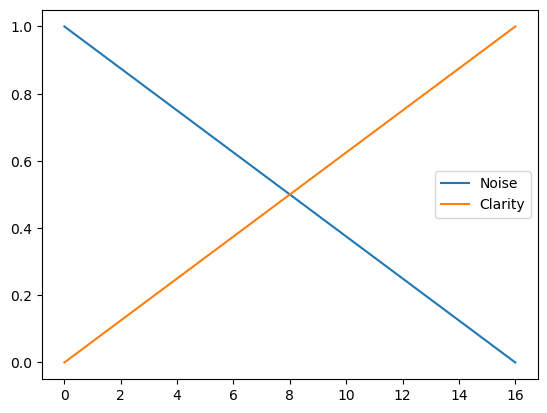

In [3]:
plt.plot(time_bar, label='Noise')
plt.plot(1 - time_bar, label='Clarity')
plt.legend()

## Import data

In [4]:
# Prepare CIFAR10

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

all_trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

Files already downloaded and verified


## 1_
Look at the data. What is `all_trainset`? Diplay one element of `all_trainset`. Try to print a image 

*Hint: use .permute()*.

In [5]:
all_trainset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
           )

In [6]:
all_trainset[0][0].shape

torch.Size([3, 32, 32])

In [7]:
len(all_trainset)

50000

In [8]:
all_trainset[1][0][0]

tensor([[ 0.2078, -0.0118, -0.1765,  ..., -0.2863, -0.3176, -0.3804],
        [ 0.0980,  0.1373, -0.0196,  ..., -0.2471, -0.3961, -0.4431],
        [ 0.0980,  0.0902, -0.0980,  ..., -0.3804, -0.4667, -0.4745],
        ...,
        [ 0.3725,  0.2235,  0.2078,  ..., -0.6706, -0.5216, -0.2706],
        [ 0.2941,  0.2235,  0.2471,  ..., -0.1922, -0.0353,  0.0275],
        [ 0.2784,  0.2392,  0.2784,  ...,  0.1216,  0.1216,  0.1216]])

## 2_
- Create a list `idx` of idexes of elements of `all_trainset` where the label is a car.
- Then create `sub_trainset` with the class `Subset` from `torch.utils.data`.

In [9]:
idx = []
for i in range(len(all_trainset)):
  if all_trainset[i][1] == 2:
    idx.append(i)

sub_trainset = torch.utils.data.Subset(dataset=all_trainset,indices=idx)
trainloader = torch.utils.data.DataLoader(sub_trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

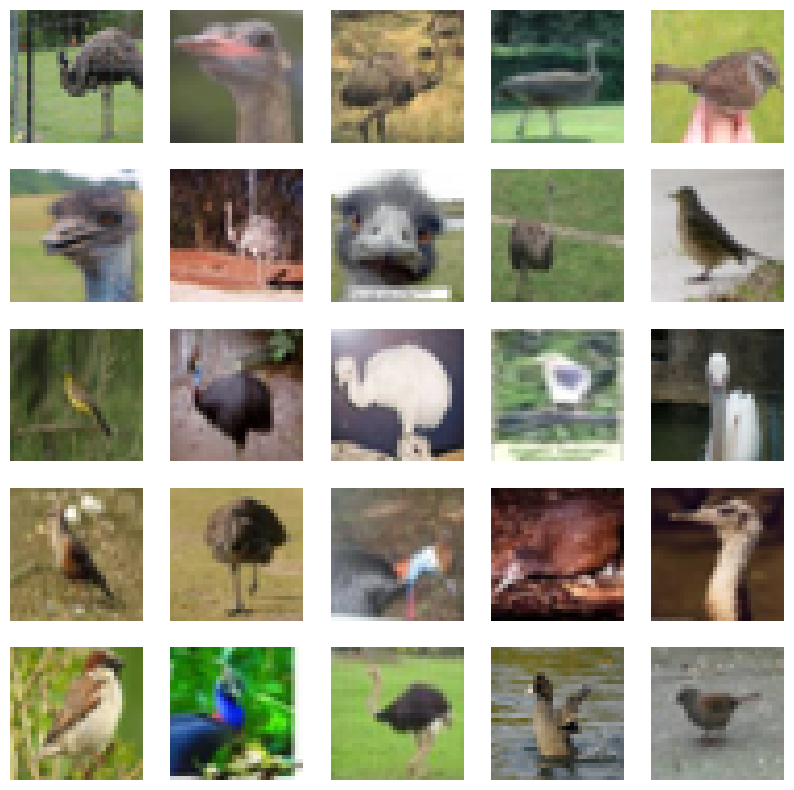

In [10]:
def cvtImg(img):
    img = img.permute([0, 2, 3, 1])
    img = img - img.min()
    img = (img / img.max())
    return img.numpy().astype(np.float32)

def show_examples(x):
    plt.figure(figsize=(10, 10))
    imgs = cvtImg(x)
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.imshow(imgs[i])
        plt.axis('off')

x, _ = next(iter(trainloader))
show_examples(x)

## 3_
Creation of functions.

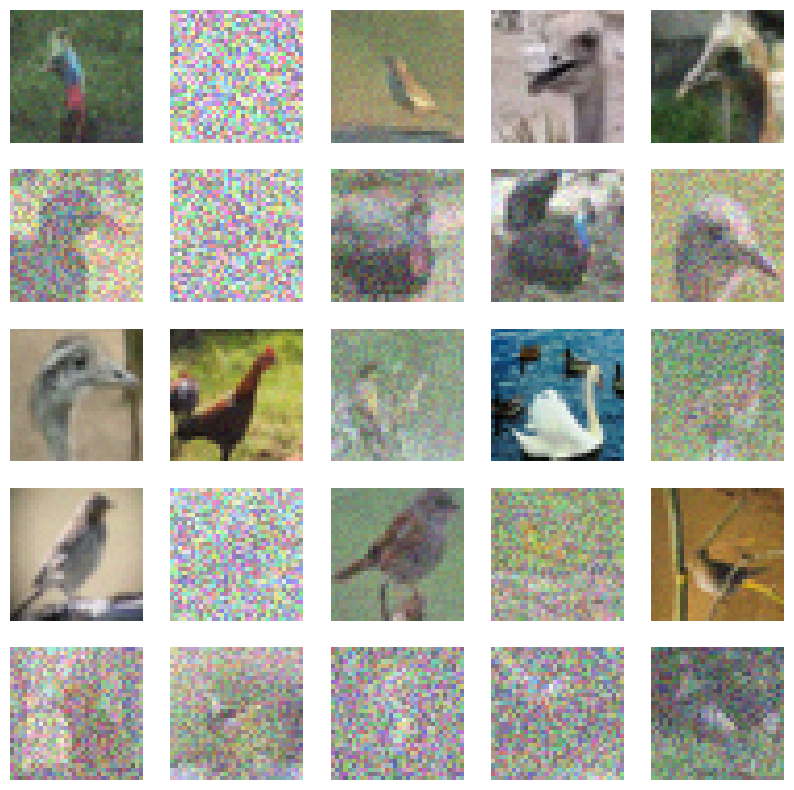

In [17]:
def forward_noise(x, t):
    """_summary_

    Args:
        x (_type_): images shape (n_images, channels, 32, 32)
        t (_type_): how 

    Returns:
        _type_: _description_
    """
    a = time_bar[t]      # base on t
    b = time_bar[t + 1]  # image for t + 1
    
    noise = np.random.random(x.shape)
    a = a.reshape((-1, 1, 1, 1))
    b = b.reshape((-1, 1, 1, 1))
    img_a = x * (1 - a) + noise * a
    img_b = x * (1 - b) + noise * b
    return img_a, img_b
    
def generate_ts(num):
    return np.random.randint(0, timesteps, size=num)

t = generate_ts(25)             # random for training data
x, _ = next(iter(trainloader))
a, b = forward_noise(x[:25], t)
show_examples(a)

In [12]:
a = time_bar[[5, 2]]
a

array([0.6875, 0.875 ])

In [13]:
a.reshape((-1, 1, 1, 1))

array([[[[0.6875]]],


       [[[0.875 ]]]])